# Homework 3
Linear Regression with Gradient Descent (from scratch)


In [1]:
import numpy as np  # Only for data loading and plotting
import matplotlib.pyplot as plt

class LinearRegressionGD:
    """
    Linear Regression using Gradient Descent
    Model: y_hat = m * x + b

    This implementation follows the mathematical framework from Part 1:
    - Compute gradient contribution from each data point
    - Sum all contributions to get total gradient
    - Update parameters
    """

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        learning_rate: step size for gradient descent (α)
        num_iterations: number of iterations to run
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.m = 0  # slope
        self.b = 0  # intercept
        self.loss_history = []  # track loss over iterations

    def predict(self, x):
        """
        Make a prediction for a single input value

        Input:
            x: a single input value (scalar)
        Returns:
            y_hat: predicted value (scalar)
        """
        return self.m * x + self.b

    def optimize(self, X, y):
        """
        Train the model using gradient descent

        Inputs:
            X: list or array of input values
            y: list or array of true output values
        Returns:
            self (for method chaining)
        """
        n = len(X)
        self.loss_history = []

        for iteration in range(self.num_iterations):
            grad_m = 0.0
            grad_b = 0.0
            total_loss = 0.0

            # Loop over each data point individually (no vectorized gradients)
            for x_i, y_i in zip(X, y):
                y_hat = self.predict(x_i)
                error = y_hat - y_i

                grad_m += (2.0 / n) * error * x_i
                grad_b += (2.0 / n) * error
                total_loss += error ** 2

            self.m -= self.learning_rate * grad_m
            self.b -= self.learning_rate * grad_b

            self.loss_history.append(total_loss / n)

        return self


In [2]:
# Data from Problem 1.1
X_small = [2.5, 3.0, 3.5, 4.0, 4.5]
y_small = [30, 25, 22, 18, 15]

# Train model
model = LinearRegressionGD(learning_rate=0.01, num_iterations=100)
model.optimize(X_small, y_small)

print(f"\nFinal parameters:")
print(f"m (slope): {model.m:.4f}")
print(f"b (intercept): {model.b:.4f}")
print(f"Final Loss: {model.loss_history[-1]:.4f}")



Final parameters:
m (slope): 4.4800
b (intercept): 4.7464
Final Loss: 73.3700


In [6]:
# Verification: 1 iteration from m=-5, b=40
verify_model = LinearRegressionGD(learning_rate=0.01, num_iterations=1)
verify_model.m = -5
verify_model.b = 40
verify_model.optimize(X_small, y_small)

print("After 1 iteration with lr=0.01 from m=-5, b=40:")
print(f"m: {verify_model.m:.4f}")
print(f"b: {verify_model.b:.4f}")
print("Compare these values to your hand calculation from Problem 1.4 Part B Q3.")


After 1 iteration with lr=0.01 from m=-5, b=40:
m: -5.0590
b: 39.9900
Compare these values to your hand calculation from Problem 1.4 Part B Q3.


In [8]:
from urllib.request import urlretrieve
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
urlretrieve(url, "auto-mpg.data")

# Only the numeric columns (ignore car_name because it has spaces)
column_names_num = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                    'acceleration', 'model_year', 'origin']

data = pd.read_csv(
    "auto-mpg.data",
    sep=r"\s+",
    header=None,
    names=column_names_num,
    usecols=list(range(8)),   # read only the first 8 columns
    na_values="?",
    engine="python",
)

data = data.dropna()

X_full = (data["weight"].astype(float).to_numpy() / 1000)
y_full = data["mpg"].astype(float).to_numpy()

print(f"Dataset size: {len(X_full)} vehicles")

Dataset size: 392 vehicles


In [9]:
# Train model on full dataset
# Start with the same learning rate as before and adjust if needed
model_full = LinearRegressionGD(learning_rate=0.01, num_iterations=1000)
model_full.optimize(X_full, y_full)

print(f"\nFull dataset - Final parameters:")
print(f"m (slope): {model_full.m:.4f}")
print(f"b (intercept): {model_full.b:.4f}")
print(f"Final Loss: {model_full.loss_history[-1]:.4f}")

x_test = 3.0
print(f"Predicted MPG for 3000 lbs (x=3.0): {model_full.predict(x_test):.4f}")



Full dataset - Final parameters:
m (slope): -4.1255
b (intercept): 34.9596
Final Loss: 28.2222
Predicted MPG for 3000 lbs (x=3.0): 22.5832


### Problem 2.2 Questions (fill in after running)
- Slope interpretation: For every 1000 lb increase in vehicle weight, MPG changes by approximately `m` MPG.
- Relationship sense-check: Heavier cars usually get lower MPG, so a negative slope is expected.
- Learning rate note: Keep `0.01` if loss decreases smoothly; reduce it if the loss oscillates/diverges.


In [10]:
class LinearRegressionGDMomentum:
    """
    Linear Regression using Gradient Descent with Momentum

    Momentum update rule (from Going Beyond 1.4):
        v_m = β * v_m + gradient_m
        m = m - α * v_m
    """

    def __init__(self, learning_rate=0.01, num_iterations=1000, momentum=0.9):
        """
        learning_rate: step size α
        num_iterations: number of iterations
        momentum: momentum coefficient β (typically 0.9)
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.momentum = momentum
        self.m = 0
        self.b = 0
        self.v_m = 0  # velocity for m
        self.v_b = 0  # velocity for b
        self.loss_history = []

    def predict(self, x):
        """Same as before"""
        return self.m * x + self.b

    def optimize(self, X, y):
        """
        Train using gradient descent with momentum

        Inputs:
            X: list or array of input values
            y: list or array of true output values
        Returns:
            self
        """
        n = len(X)
        self.loss_history = []

        for _ in range(self.num_iterations):
            grad_m = 0.0
            grad_b = 0.0
            total_loss = 0.0

            for x_i, y_i in zip(X, y):
                y_hat = self.predict(x_i)
                error = y_hat - y_i

                grad_m += (2.0 / n) * error * x_i
                grad_b += (2.0 / n) * error
                total_loss += error ** 2

            self.v_m = self.momentum * self.v_m + grad_m
            self.v_b = self.momentum * self.v_b + grad_b

            self.m -= self.learning_rate * self.v_m
            self.b -= self.learning_rate * self.v_b

            self.loss_history.append(total_loss / n)

        return self


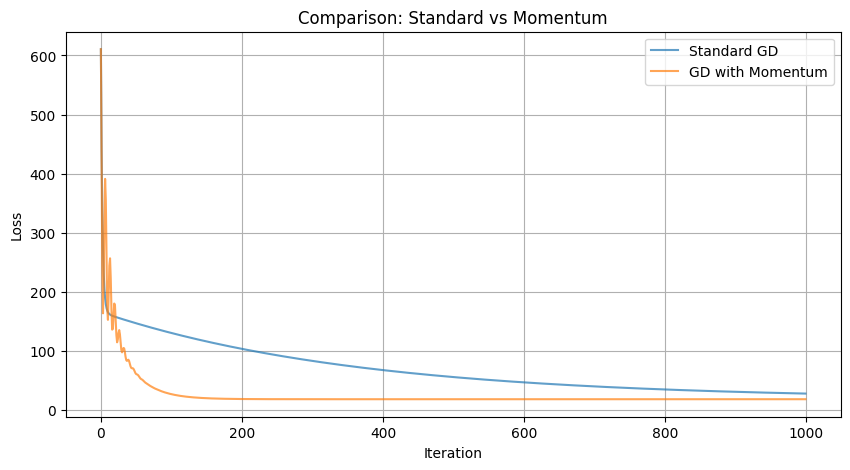

Standard GD final loss: 28.2222
Momentum GD final loss: 18.6766


In [11]:
# Standard gradient descent
model_standard = LinearRegressionGD(learning_rate=0.01, num_iterations=1000)
model_standard.optimize(X_full, y_full)

# Gradient descent with momentum
model_momentum = LinearRegressionGDMomentum(learning_rate=0.01, num_iterations=1000, momentum=0.9)
model_momentum.optimize(X_full, y_full)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(model_standard.loss_history, label='Standard GD', alpha=0.7)
plt.plot(model_momentum.loss_history, label='GD with Momentum', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Comparison: Standard vs Momentum')
plt.legend()
plt.grid(True)
plt.show()

print(f"Standard GD final loss: {model_standard.loss_history[-1]:.4f}")
print(f"Momentum GD final loss: {model_momentum.loss_history[-1]:.4f}")


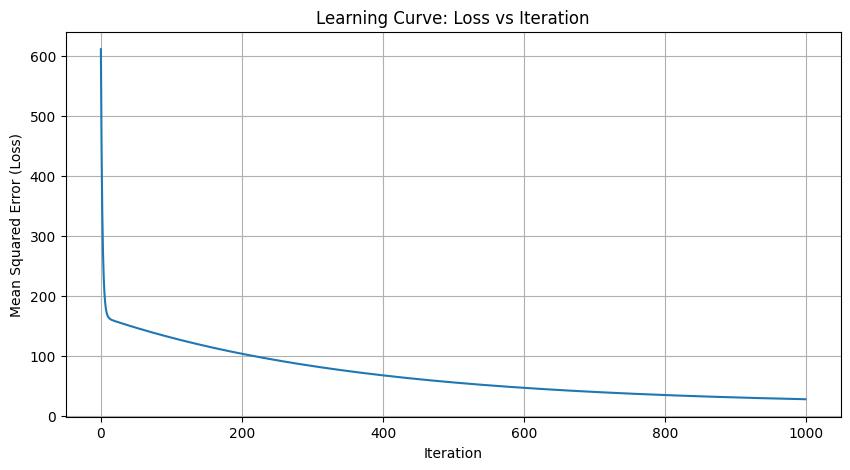

In [12]:
# Part 3.1: Learning curve
plt.figure(figsize=(10, 5))
plt.plot(model_full.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Learning Curve: Loss vs Iteration')
plt.grid(True)
plt.show()


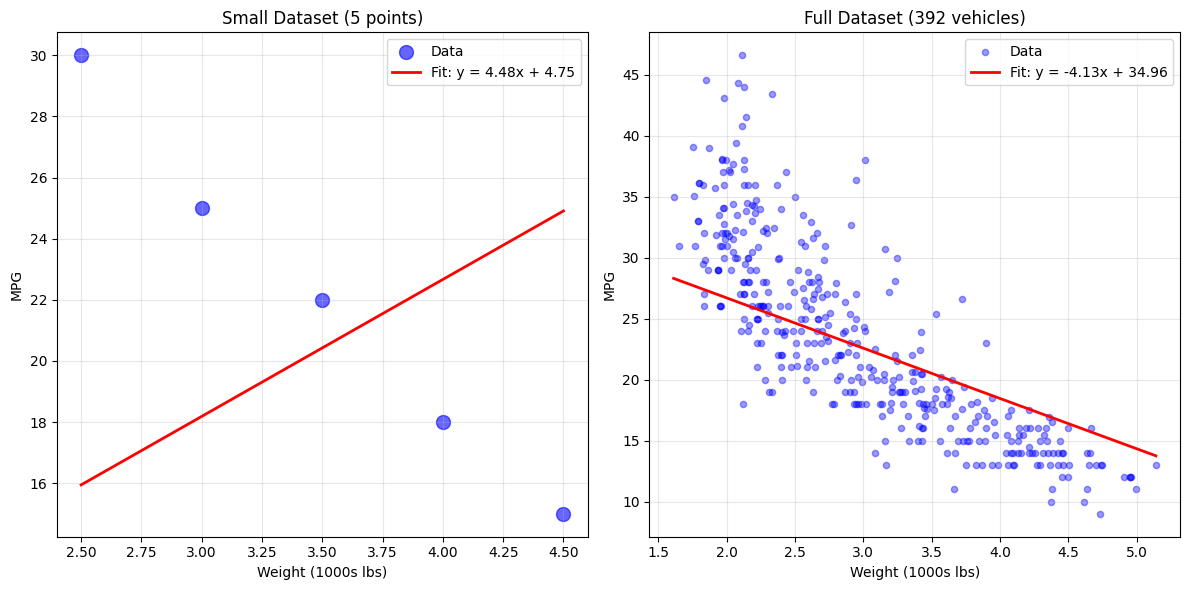

In [13]:
# Part 3.2: Model fit visualization
plt.figure(figsize=(12, 6))

# Plot 1: Small dataset
plt.subplot(1, 2, 1)
plt.scatter(X_small, y_small, color='blue', s=100, alpha=0.6, label='Data')
# Plot the fitted line
x_line = np.linspace(min(X_small), max(X_small), 100)
y_line = [model.predict(x) for x in x_line]
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Fit: y = {model.m:.2f}x + {model.b:.2f}')
plt.xlabel('Weight (1000s lbs)')
plt.ylabel('MPG')
plt.title('Small Dataset (5 points)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Full dataset
plt.subplot(1, 2, 2)
plt.scatter(X_full, y_full, color='blue', s=20, alpha=0.4, label='Data')
x_line = np.linspace(min(X_full), max(X_full), 100)
y_line = [model_full.predict(x) for x in x_line]
plt.plot(x_line, y_line, 'r-', linewidth=2,
         label=f'Fit: y = {model_full.m:.2f}x + {model_full.b:.2f}')
plt.xlabel('Weight (1000s lbs)')
plt.ylabel('MPG')
plt.title(f'Full Dataset ({len(X_full)} vehicles)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
